# resources: delete later

- https://www.kdnuggets.com/2020/05/optimize-response-time-machine-learning-api-production.html

In [ ]:
todo:
    1. dockerize
    2. testing
    3. review

#  Part 1: Data Processing
Download the data set (accepted_2007_to_2018Q4.csv). Filter the data set for year 2015.
-	Show how you process and clean the data in Jupyter notebook.
-	Show simple analytics over the data.




In [1]:
import gc

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the whole csv file

df = pd.read_csv('accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv')

C:\Users\acc_a\anaconda3\envs\tech\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# take a peek at the data
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# take a look at df shape. There's around 2.26 mil data point with 151 columns. Let's see the column name
df.shape

(2260701, 151)

In [5]:
df.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'po

In [6]:
# the data is using 2.5gb memory. let's filter it for easier work
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [7]:
# looking at the data info in kaggle, the date column is issue_d. lets filter this to year 2015 only.
df.issue_d.value_counts()

Mar-2016    61992
Oct-2015    48631
May-2018    46311
Oct-2018    46305
Aug-2018    46079
            ...  
Aug-2007       74
Jul-2007       63
Sep-2008       57
Sep-2007       53
Jun-2007       24
Name: issue_d, Length: 139, dtype: int64

In [8]:
# we could split the issue_d column into month and year, and then filter. or we could just use string filtering here
# need to remove null value first in this column

df = df[~df['issue_d'].isna()]

df_2015 = df[df['issue_d'].str.contains('2015')].copy()

In [9]:
df_2015.shape

(421095, 151)

In [10]:
# lets see the distribution

df_2015.issue_d.value_counts()

Oct-2015    48631
Jul-2015    45962
Dec-2015    44343
Nov-2015    37530
Aug-2015    35886
Apr-2015    35427
Jan-2015    35107
May-2015    31913
Sep-2015    28641
Jun-2015    28485
Mar-2015    25400
Feb-2015    23770
Name: issue_d, dtype: int64

In [11]:
# garbage collection to free memory
gc.collect()

100

In [12]:
# remove column with majority null data
df.isnull().mean().round(4).mul(100).sort_values(ascending=False).head(50)

member_id                                     100.00
orig_projected_additional_accrued_interest     99.62
hardship_end_date                              99.52
hardship_start_date                            99.52
hardship_type                                  99.52
hardship_reason                                99.52
hardship_status                                99.52
deferral_term                                  99.52
hardship_last_payment_amount                   99.52
hardship_payoff_balance_amount                 99.52
hardship_loan_status                           99.52
hardship_dpd                                   99.52
hardship_length                                99.52
payment_plan_start_date                        99.52
hardship_amount                                99.52
settlement_term                                98.49
debt_settlement_flag_date                      98.49
settlement_status                              98.49
settlement_date                               

In [12]:
# remove columns with more than 70% null
df = df.loc[:, df.isnull().sum() < 0.7*df.shape[0]]
df.shape

(2260668, 110)

In [13]:
# removed around 40 columns

df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,...,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2260668 entries, 0 to 2260698
Columns: 110 entries, id to debt_settlement_flag
dtypes: float64(85), object(25)
memory usage: 1.9+ GB


In [15]:
# remove non-numeric columns or convert to binary
# select object type column to filter

# obj_df = df.select_dtypes(include=['object']).copy()
df.select_dtypes(include=['object']).head().T

,0,1,2,3,4
id,68407277,68355089,68341763,66310712,68476807
term,36 months,36 months,60 months,60 months,60 months
grade,C,C,B,C,F
sub_grade,C4,C1,B4,C5,F1
emp_title,leadman,Engineer,truck driver,Information Systems Officer,Contract Specialist
emp_length,10+ years,10+ years,10+ years,10+ years,3 years
home_ownership,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE
verification_status,Not Verified,Not Verified,Not Verified,Source Verified,Source Verified
issue_d,Dec-2015,Dec-2015,Dec-2015,Dec-2015,Dec-2015
loan_status,Fully Paid,Fully Paid,Fully Paid,Current,Fully Paid


In [16]:
df.select_dtypes(include=['object']).nunique()

id                      2260668
term                          2
grade                         7
sub_grade                    35
emp_title                512694
emp_length                   11
home_ownership                6
verification_status           3
issue_d                     139
loan_status                   9
pymnt_plan                    2
url                     2260668
purpose                      14
title                     63155
zip_code                    956
addr_state                   51
earliest_cr_line            754
initial_list_status           2
last_pymnt_d                136
next_pymnt_d                106
last_credit_pull_d          141
application_type              2
hardship_flag                 2
disbursement_method           2
debt_settlement_flag          2
dtype: int64

In [17]:
# change datetime columns to proper format

date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
df[date_cols] = df[date_cols].apply(pd.to_datetime)
df[date_cols].head()

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,2015-12-01,2003-08-01,2019-01-01,NaT,2019-03-01
1,2015-12-01,1999-12-01,2016-06-01,NaT,2019-03-01
2,2015-12-01,2000-08-01,2017-06-01,NaT,2019-03-01
3,2015-12-01,2008-09-01,2019-02-01,2019-04-01,2019-03-01
4,2015-12-01,1998-06-01,2016-07-01,NaT,2018-03-01


In [18]:
# remove columns not much info can be extracted from these data

df = df.drop(['emp_title', 'url', 'title', 'zip_code', 'addr_state'], axis=1)


In [19]:
df.hardship_flag.value_counts()

N    2259836
Y        832
Name: hardship_flag, dtype: int64

In [20]:
# we can remove columns with too much unique value.
df.loan_status.value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

# Part 2: Model Building
Using at most 10 features from the above data set, build a machine learning model to predict those with late payment (refer column “loan_status”). Show the model’s accuracy, AUC or other relevant metrics. 
-	Show how you optimise the model.
-	Show how the features are selected.

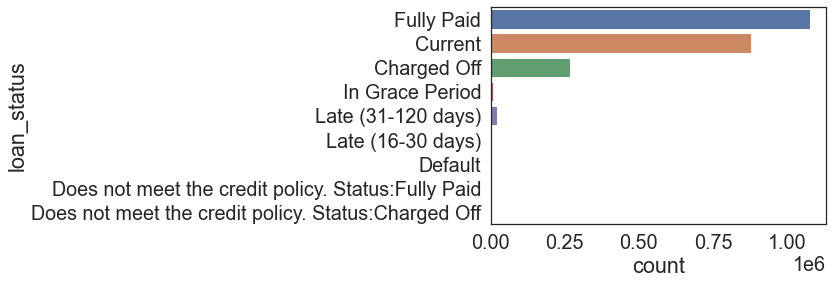

In [61]:
sns.countplot(y='loan_status', data=df);

In [21]:
# for this machine learning model, lets assume the class is either fully paid or charged off. 
# so the model will predict whether the oan is fully paid or charged off only

status_df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])].copy()

# turn to boolean
status_df['loan_status'] = np.where(status_df['loan_status']=='Fully Paid', 1, 0) 

In [22]:
# look at loan amount column
status_df.groupby('loan_status').describe().loan_amnt

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,268559.0,15565.055444,8814.560077,900.0,9000.0,14350.0,20400.0,40000.0
1,1076751.0,14134.369808,8669.028973,500.0,7500.0,12000.0,20000.0,40000.0


In [23]:
# let's first see how numeric column relates to target column, since we are only using 10 features
status_df = status_df.select_dtypes(exclude=['object', 'datetime'])

In [36]:
status_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345310 entries, 0 to 2260697
Data columns (total 86 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   loan_amnt                       1345310 non-null  float64
 1   funded_amnt                     1345310 non-null  float64
 2   funded_amnt_inv                 1345310 non-null  float64
 3   int_rate                        1345310 non-null  float64
 4   installment                     1345310 non-null  float64
 5   annual_inc                      1345310 non-null  float64
 6   loan_status                     1345310 non-null  int32  
 7   dti                             1344936 non-null  float64
 8   delinq_2yrs                     1345310 non-null  float64
 9   fico_range_low                  1345310 non-null  float64
 10  fico_range_high                 1345310 non-null  float64
 11  inq_last_6mths                  1345309 non-null  float64
 12  

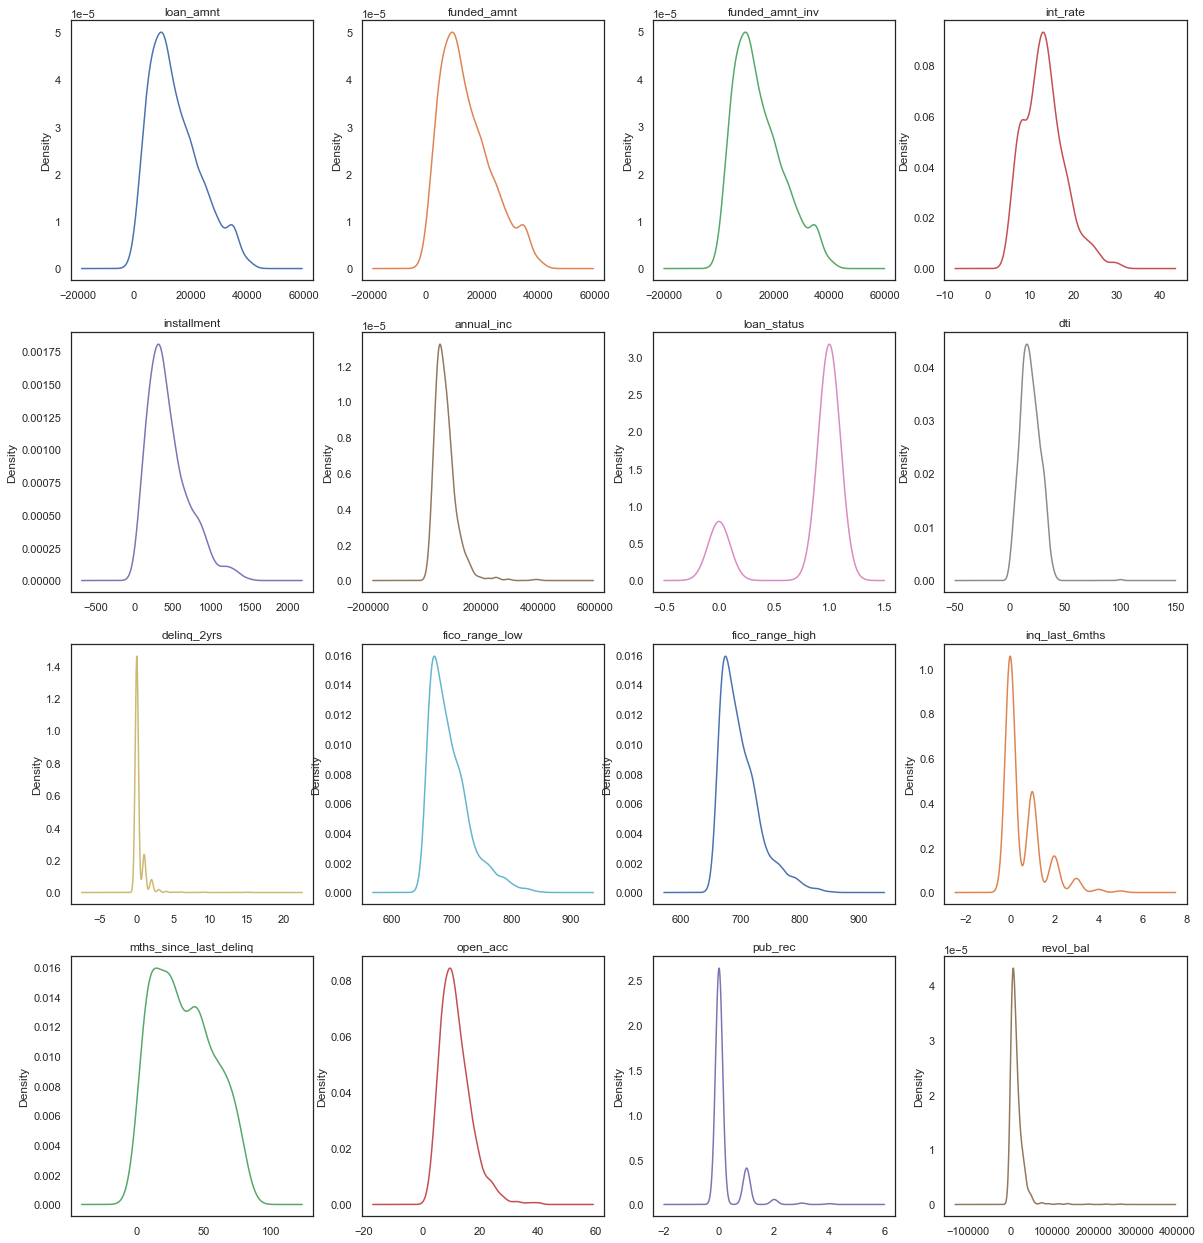

In [37]:
# - feature selection, select 10 most influential
sns.set(font_scale=1, style='white')
status_df.iloc[:,:16].sample(1000).plot(kind='density', subplots=True, layout=(4,4), legend=False,
                    sharex=False, figsize=(20,22), title=status_df.iloc[:,:16].columns.tolist());

In [38]:
# # correlation plot

# X = df[list(df.columns)[:]]

# corr = X.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True
# with sns.axes_style("white"):
#     plt.figure(figsize=(20, 15))
#     sns.heatmap(corr, vmax=1, square=True, cmap="YlGnBu", linecolor='black', mask=mask, annot=False, fmt = '.2f', 
#                 annot_kws={"size":9})
#     plt.yticks(rotation=0,fontsize=12)
#     plt.xticks(rotation=90,fontsize=12)
#     plt.title('Feature Correlation ',fontsize=20)
# #     plt.savefig('heatmap.png', format='png', dpi=600)
#     plt.show();

In [30]:
# grade_df = df.sort_values(by = ['grade'])
# sns.countplot(x='grade', data=grade_df, hue ='loan_status')

In [24]:
corr = status_df.iloc[:, :].corr()

In [25]:
corr.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeof

In [45]:
# find feature correlated to late payment 

cor_dict = corr['loan_status'].to_dict()
del cor_dict['loan_status']
print("List the features in descending order of their correlation with loan_status:\n")
for ele in sorted(cor_dict.items(), key=lambda x: -abs(x[1])):
    print("{0}:   {1}".format(*ele))

List the features in descending order of their correlation with loan_status:

last_fico_range_high:   0.6678415174331005
last_fico_range_low:   0.5757063563487615
recoveries:   -0.505414949882516
collection_recovery_fee:   -0.48021649343743805
total_rec_prncp:   0.43894392392307885
last_pymnt_amnt:   0.347384797010831
total_pymnt:   0.3151804197281873
total_pymnt_inv:   0.3147507427814939
int_rate:   -0.258791666420336
total_rec_late_fee:   -0.14103221362332524
fico_range_low:   0.13068331581617015
fico_range_high:   0.1306820072204806
acc_open_past_24mths:   -0.09986854961457219
all_util:   -0.08901422703217256
num_tl_op_past_12m:   -0.08562319385658927
dti:   -0.08451003458937172
bc_open_to_buy:   0.08204386489660534
open_rv_24m:   -0.08191214765904896
avg_cur_bal:   0.07892375839035477
tot_hi_cred_lim:   0.0784732042738691
mort_acc:   0.07529392287530472
total_bc_limit:   0.07217112784297383
tot_cur_bal:   0.07120620937670977
num_actv_rev_tl:   -0.07081436864883829
num_rev_tl_bal_gt

In [28]:
# select top 10 features from the above with highest correlation

high_cor = ['last_fico_range_high', 'last_fico_range_low',
            'recoveries', 'collection_recovery_fee', 
            'total_rec_prncp', 'last_pymnt_amnt',
            'total_pymnt', 'total_pymnt_inv',
            'int_rate', 'total_rec_late_fee']


In [29]:
ml_df = status_df[high_cor].copy()
ml_df['loan_status'] = status_df['loan_status']

In [30]:
ml_df.loan_status.value_counts(normalize=True)

1    0.800374
0    0.199626
Name: loan_status, dtype: float64

In [37]:
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

In [31]:
X = ml_df.iloc[:, :-1]
y = ml_df[['loan_status']]

In [32]:
# split data for training and testing
rs = 24

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=rs, stratify=y)

In [70]:
# # scale input
# scaler = preprocessing.StandardScaler().fit(X_train)

# X_train_scaled = scaler.transform(X_train)

In [33]:
# pipe = make_pipeline(StandardScaler(), LogisticRegression())
# pipe.fit(X_train, y_train.values.ravel())

In [34]:
# clf = LogisticRegression(random_state=rs).fit(X_train_scaled, y_train)

In [38]:
clf = RandomForestClassifier(random_state=rs)
clf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=24)

In [39]:
preds = clf.predict(X_train)

val_accuracy = accuracy_score(y_train, preds)
val_roc_auc = roc_auc_score(y_train, preds)
val_confusion_matrix = confusion_matrix(y_train, preds)
print(f'Accuracy Score: {val_accuracy}')
print(f'ROC AUC Score: {val_roc_auc}')
print(f'Confusion Matrix: \n{val_confusion_matrix}')

Accuracy Score: 0.9999990089020419
ROC AUC Score: 0.999997517612539
Confusion Matrix: 
[[201418      1]
 [     0 807563]]


In [40]:
test_preds = clf.predict(X_test)

test_accuracy = accuracy_score(y_test, test_preds)
test_roc_auc = roc_auc_score(y_test, test_preds)
test_confusion_matrix = confusion_matrix(y_test, test_preds)
print(f'Accuracy Score: {test_accuracy}')
print(f'ROC AUC Score: {test_roc_auc}')
print(f'Confusion Matrix: \n{test_confusion_matrix}')

Accuracy Score: 0.9946926809543065
ROC AUC Score: 0.9897476711358095
Confusion Matrix: 
[[ 65899   1241]
 [   544 268644]]


In [43]:
joblib.dump(clf, 'rf_model.pkl')

['rf_model.pkl']

In [58]:
rf_model = joblib.load('rf_model.pkl')

In [45]:
test_preds = clf.predict(X_test)

test_accuracy = accuracy_score(y_test, test_preds)
test_roc_auc = roc_auc_score(y_test, test_preds)
test_confusion_matrix = confusion_matrix(y_test, test_preds)
print(f'Accuracy Score: {test_accuracy}')
print(f'ROC AUC Score: {test_roc_auc}')
print(f'Confusion Matrix: \n{test_confusion_matrix}')

Accuracy Score: 0.9946926809543065
ROC AUC Score: 0.9897476711358095
Confusion Matrix: 
[[ 65899   1241]
 [   544 268644]]


# Part 3: Model Deployment
Take the model from Part 2 and deploy it with Flask (or similar framework) in a docker. 
-	Prepare a readme.md to elaborate how your scripts work.
-	Show the docker script.
-	Show the integration of your model with Flask.
-	Show your test script, i.e., the script that call the Flask and get the response from the model. 
-	Devise a test script such that it will load all the test data from year 2018. Then, send the requests to Flask (correspond to the model). Store all the result in csv. 
-	Instead of having Flask handling the request one-by-one, how do you further increase the throughput of the prediction? Please state your assumptions. 


## [Link to github repo](https://github.com/asyrafjanai/)

In [47]:
sample_df = pd.read_csv('accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv')

sample_df = sample_df[~sample_df['issue_d'].isna()]

df_2018 = sample_df[sample_df['issue_d'].str.contains('2018')].copy()

In [49]:
del sample_df
gc.collect()

89

In [50]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495242 entries, 421097 to 1611876
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 574.3+ MB


In [52]:
# select only high-correlation df

ml_2018 = df_2018[high_cor].copy()
ml_2018['loan_status'] = df_2018['loan_status']

In [54]:
ml_2018['loan_status'] = np.where(ml_2018['loan_status']=='Fully Paid', 1, 0) 

In [55]:
ml_2018.head()

,last_fico_range_high,last_fico_range_low,recoveries,collection_recovery_fee,total_rec_prncp,last_pymnt_amnt,total_pymnt,total_pymnt_inv,int_rate,total_rec_late_fee,loan_status
421097,609.0,605.0,0.0,0.0,1219.69,186.82,2043.690000,2043.69,20.39,0.0,0
421098,694.0,690.0,0.0,0.0,4121.50,483.45,5301.420000,5301.42,9.92,0.0,0
421099,629.0,625.0,0.0,0.0,1006.27,367.82,4007.700000,4007.70,30.79,0.0,0
421100,669.0,665.0,0.0,0.0,2811.27,688.35,7511.160000,7511.16,21.85,0.0,0
421101,764.0,760.0,0.0,0.0,3000.00,614.03,3011.577285,3011.58,7.34,0.0,1


In [81]:
ml_2018.to_csv('ml_2018.csv', index=False)

In [60]:
ml_2018.iloc[:,-1]

421097     0
421098     0
421099     0
421100     0
421101     1
          ..
1611872    0
1611873    0
1611874    0
1611875    0
1611876    0
Name: loan_status, Length: 495242, dtype: int32

In [61]:
test_preds = clf.predict(ml_2018.iloc[:,:-1])
y_test = ml_2018.iloc[:,-1]

test_accuracy = accuracy_score(y_test, test_preds)
test_roc_auc = roc_auc_score(y_test, test_preds)
test_confusion_matrix = confusion_matrix(y_test, test_preds)
print(f'Accuracy Score: {test_accuracy}')
print(f'ROC AUC Score: {test_roc_auc}')
print(f'Confusion Matrix: \n{test_confusion_matrix}')

Accuracy Score: 0.7841540095549246
ROC AUC Score: 0.8806426111773612
Confusion Matrix: 
[[340902 106896]
 [     0  47444]]


# Part 4: Model Performance
Filter the data set for year 2018. Apply the model from Part II to the data set of year 2018. Support your answer with hypothesis testing, evidence, or theories if possible.
-	How accurate is the prediction over the late payment? 
  - nedd to test
-	Assume that you do not have the late payment information (column “loan_status”), how do you know your model is degrading or improving?
  - data drift. create data drift monitor by comparing the newer dataset with previous dataset. set alert if data drifft is over the threshold.
-	How many months/years of data we should take to build a model? Assume that you favour long data (e.g., 10 years), how do you train the model?
  - we can select all the dataset and do some stratified sampling to make sure we have the correct representation for each year
-	Assume that you favour a relatively short data (e.g., 3 months data), how do you ensure your model will capture the sudden change of population (e.g., MCO causes the economy collapse)? 
  - data drift monitor. let say the value is over the threshold, we need to retrain the model since current model will not produce accurate result when making prediction.


In [1]:
import requests
import json

In [9]:
url = 'http://localhost:5000/predict'

# with open('ml_2018_sample.csv', 'rb') as f:
#     csv_file = 
    
    
files = {'file': open('ml_2018_sample.csv', 'rb')}

r = requests.post(url, files=files)

In [12]:
r.json()['result']

'[1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]'

In [3]:
r.json()['result']

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [113]:
json.loads(r.json()['result'])

[1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

In [91]:
import pendulum

In [92]:
now = pendulum.now()

In [95]:
now.date().to_date_string()

'2021-06-27'